In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
# Read and create data frame for Border Entries file
bd_ent = pd.read_csv('Border_Crossing_Entry_Data.csv')
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


In [5]:
# Read and create data frame for Trade file
trade = pd.read_csv('COW_Trade_3.0/dyadic_trade_3.0.csv')
trade.head()

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [6]:
# clean trade dataframe to only get data on us imports from canada
can_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Canada')]
can_export.head()
#flow 1 is from importer 2 into importer 1

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [7]:
# clean trade dataframe to only get data on us imoprts from mexico
mex_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Mexico')]
mex_export.head()
#flow 1 is from importer 2 into importer 1

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
790,2.0,70,1870,United States of America,Mexico,3.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
791,2.0,70,1871,United States of America,Mexico,3.0,8.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
792,2.0,70,1872,United States of America,Mexico,-9.0,-9.0,-9,-9,-9.0,-9.0,-9.0,-9.0,2.01
793,2.0,70,1873,United States of America,Mexico,4.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01
794,2.0,70,1874,United States of America,Mexico,4.0,6.0,1,1,-9.0,-9.0,-9.0,-9.0,2.01


In [8]:
# append mexico export data frame to canada export data frame
complete_nafta_trade = can_export.append(mex_export)
complete_nafta_trade
#flow 1 is entering millions of dollars into US from 'importer 2'

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,source1,source2,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,version
0,2.0,20,1920,United States of America,Canada,611.86,735.48,1,1,-9.0,-9.0,-9.0,-9.0,2.01
1,2.0,20,1921,United States of America,Canada,335.44,442.99,1,1,-9.0,-9.0,-9.0,-9.0,2.01
2,2.0,20,1922,United States of America,Canada,364.02,502.84,1,1,-9.0,-9.0,-9.0,-9.0,2.01
3,2.0,20,1923,United States of America,Canada,416.00,598.14,1,1,-9.0,-9.0,-9.0,-9.0,2.01
4,2.0,20,1924,United States of America,Canada,399.14,496.32,1,1,-9.0,-9.0,-9.0,-9.0,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,2.0,70,2005,United States of America,Mexico,172485.00,130402.00,2,2,-9.0,-9.0,-9.0,-9.0,2.01
926,2.0,70,2006,United States of America,Mexico,200515.00,143421.00,2,2,-9.0,-9.0,-9.0,-9.0,2.01
927,2.0,70,2007,United States of America,Mexico,212889.00,153420.00,2,2,-9.0,-9.0,-9.0,-9.0,3.00
928,2.0,70,2008,United States of America,Mexico,218086.00,166468.00,2,2,-9.0,-9.0,-9.0,-9.0,3.00


In [9]:
nafta_trade = complete_nafta_trade[['year', 'importer1', 'importer2', 'flow1']].copy()
nafta_trade

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14
...,...,...,...,...
925,2005,United States of America,Mexico,172485.00
926,2006,United States of America,Mexico,200515.00
927,2007,United States of America,Mexico,212889.00
928,2008,United States of America,Mexico,218086.00


In [10]:
nafta_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 929
Data columns (total 4 columns):
year         230 non-null int64
importer1    230 non-null object
importer2    230 non-null object
flow1        230 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.0+ KB


In [11]:
bd_ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [12]:
bd_ent['Year'] = pd.to_datetime(bd_ent['Date'])

In [13]:
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019-03-01


In [14]:
bd_ent['Month'] = pd.to_datetime(bd_ent['Date'])
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019-03-01,2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019-03-01,2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019-03-01,2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019-03-01,2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019-03-01,2019-03-01
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996-01-01,1996-01-01
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996-01-01,1996-01-01
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996-01-01,1996-01-01
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996-01-01,1996-01-01


In [15]:
bd_ent['Year'] = bd_ent['Year'].dt.year
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,2019-03-01
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,2019-03-01
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,2019-03-01
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,2019-03-01
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,2019-03-01


In [16]:
bd_ent['Month'] = bd_ent['Month'].dt.month
bd_ent

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [17]:
gb_year_df = bd_ent.groupby(bd_ent['Year'])

In [18]:
gb_year_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
331901,Alexandria Bay,New York,708,US-Canada Border,12/01/1996 12:00:00 AM,Pedestrians,0,POINT (-75.98 44.35),1996,12
331902,Beecher Falls,Vermont,206,US-Canada Border,12/01/1996 12:00:00 AM,Truck Containers Empty,0,POINT (-71.51 45.01),1996,12
331903,Andrade,California,2502,US-Mexico Border,12/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-114.73000000000002 32.72),1996,12
331904,Whitlash,Montana,3321,US-Canada Border,12/01/1996 12:00:00 AM,Bus Passengers,0,POINT (-111.26000000000002 49),1996,12


In [19]:
len(gb_year_df)

24

In [20]:
gb_year_df.tail()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
2359,Fort Fairfield,Maine,107,US-Canada Border,01/01/2019 12:00:00 AM,Truck Containers Full,39,POINT (-67.82965 46.76891),2019,1
2360,Vanceboro,Maine,105,US-Canada Border,01/01/2019 12:00:00 AM,Train Passengers,54,POINT (-67.42955 45.55984),2019,1
2361,Roseau,Minnesota,3426,US-Canada Border,01/01/2019 12:00:00 AM,Personal Vehicles,2705,POINT (-95.81074 48.77518),2019,1
2362,El Paso,Texas,2402,US-Mexico Border,01/01/2019 12:00:00 AM,Pedestrians,582606,POINT (-106.48639 31.758610000000004),2019,1
2363,Sumas,Washington,3009,US-Canada Border,01/01/2019 12:00:00 AM,Buses,92,POINT (-122.26361 49.00028),2019,1
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [21]:
gb_year_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
331901,Alexandria Bay,New York,708,US-Canada Border,12/01/1996 12:00:00 AM,Pedestrians,0,POINT (-75.98 44.35),1996,12
331902,Beecher Falls,Vermont,206,US-Canada Border,12/01/1996 12:00:00 AM,Truck Containers Empty,0,POINT (-71.51 45.01),1996,12
331903,Andrade,California,2502,US-Mexico Border,12/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-114.73000000000002 32.72),1996,12
331904,Whitlash,Montana,3321,US-Canada Border,12/01/1996 12:00:00 AM,Bus Passengers,0,POINT (-111.26000000000002 49),1996,12


In [22]:
measures = bd_ent.groupby(['Year','Border','Measure'])['Value'].sum()
measures.head()

Year  Border            Measure                    
1996  US-Canada Border  Bus Passengers                   3870081
                        Buses                             173279
                        Pedestrians                       607987
                        Personal Vehicle Passengers    101070734
                        Personal Vehicles               39531000
Name: Value, dtype: int64

In [23]:
measures
#each item in the measure column here will become a column in the nafta_trade df, with the values shown below inserted
# into each row for the given 

Year  Border            Measure                    
1996  US-Canada Border  Bus Passengers                   3870081
                        Buses                             173279
                        Pedestrians                       607987
                        Personal Vehicle Passengers    101070734
                        Personal Vehicles               39531000
                                                         ...    
2019  US-Mexico Border  Train Passengers                    2521
                        Trains                              2916
                        Truck Containers Empty            453762
                        Truck Containers Full            1185656
                        Trucks                           1619982
Name: Value, Length: 576, dtype: int64

In [24]:
measures = measures.reset_index()

In [25]:
measures.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000


In [26]:
per_border_vals = measures.groupby('Border')
per_border_vals.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000
12,1996,US-Mexico Border,Bus Passengers,1943697
13,1996,US-Mexico Border,Buses,119510
14,1996,US-Mexico Border,Pedestrians,34109364
15,1996,US-Mexico Border,Personal Vehicle Passengers,171522486
16,1996,US-Mexico Border,Personal Vehicles,62429373


In [27]:
total_measures = bd_ent.groupby(['Year', 'Measure'])['Value'].sum()
total_measures

Year  Measure                    
1996  Bus Passengers                   5813778
      Buses                             292789
      Pedestrians                     34717351
      Personal Vehicle Passengers    272593220
      Personal Vehicles              101960373
                                       ...    
2019  Train Passengers                   38014
      Trains                              8501
      Truck Containers Empty            825680
      Truck Containers Full            2230413
      Trucks                           3005611
Name: Value, Length: 288, dtype: int64

In [28]:
total_measures.reset_index()

,Year,Measure,Value
0,1996,Bus Passengers,5813778
1,1996,Buses,292789
2,1996,Pedestrians,34717351
3,1996,Personal Vehicle Passengers,272593220
4,1996,Personal Vehicles,101960373
...,...,...,...
283,2019,Train Passengers,38014
284,2019,Trains,8501
285,2019,Truck Containers Empty,825680
286,2019,Truck Containers Full,2230413


In [29]:
total_measures = total_measures.reset_index()

In [30]:
pivoted_totals = total_measures.pivot(index = 'Year', columns = 'Measure', values = 'Value')
pivoted_totals.head()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,5813778,292789,34717351,272593220,101960373,268134,472219,224881,38966,1599429,3124031,8685180
1997,6896919,389969,44461186,307001980,119003203,354288,620145,260610,40541,1920118,3708600,9516639
1998,7608484,436803,45060023,314295857,120451297,513721,1079074,258624,41116,2405012,6223216,10217477
1999,7725590,469496,48801064,330891505,126689655,611927,1376950,265341,38949,2768834,7641245,11176168
2000,8338859,460056,47677158,329841500,129202573,684988,1481674,287756,40555,2747769,7684947,11573707


In [31]:
measures.head()

,Year,Border,Measure,Value
0,1996,US-Canada Border,Bus Passengers,3870081
1,1996,US-Canada Border,Buses,173279
2,1996,US-Canada Border,Pedestrians,607987
3,1996,US-Canada Border,Personal Vehicle Passengers,101070734
4,1996,US-Canada Border,Personal Vehicles,39531000


In [32]:
can_measures = measures.loc[(measures['Border'] == 'US-Canada Border')]
can_measures.tail()

,Year,Border,Measure,Value
559,2019,US-Canada Border,Train Passengers,35493
560,2019,US-Canada Border,Trains,5585
561,2019,US-Canada Border,Truck Containers Empty,371918
562,2019,US-Canada Border,Truck Containers Full,1044757
563,2019,US-Canada Border,Trucks,1385629


In [33]:
mex_measures = measures.loc[(measures['Border'] == 'US-Mexico Border')]
mex_measures.tail()

,Year,Border,Measure,Value
571,2019,US-Mexico Border,Train Passengers,2521
572,2019,US-Mexico Border,Trains,2916
573,2019,US-Mexico Border,Truck Containers Empty,453762
574,2019,US-Mexico Border,Truck Containers Full,1185656
575,2019,US-Mexico Border,Trucks,1619982


In [34]:
len(mex_measures)

288

In [35]:
can_measures = can_measures.reset_index()
can_measures.tail()

,index,Year,Border,Measure,Value
283,559,2019,US-Canada Border,Train Passengers,35493
284,560,2019,US-Canada Border,Trains,5585
285,561,2019,US-Canada Border,Truck Containers Empty,371918
286,562,2019,US-Canada Border,Truck Containers Full,1044757
287,563,2019,US-Canada Border,Trucks,1385629


In [36]:
mex_measures = mex_measures.reset_index()
mex_measures.tail()

,index,Year,Border,Measure,Value
283,571,2019,US-Mexico Border,Train Passengers,2521
284,572,2019,US-Mexico Border,Trains,2916
285,573,2019,US-Mexico Border,Truck Containers Empty,453762
286,574,2019,US-Mexico Border,Truck Containers Full,1185656
287,575,2019,US-Mexico Border,Trucks,1619982


In [37]:
mex_measures = mex_measures.drop(columns=['index', 'Border'])
mex_measures.head()

,Year,Measure,Value
0,1996,Bus Passengers,1943697
1,1996,Buses,119510
2,1996,Pedestrians,34109364
3,1996,Personal Vehicle Passengers,171522486
4,1996,Personal Vehicles,62429373


In [38]:
can_measures = can_measures.drop(columns=['index','Border'])
can_measures.head()

,Year,Measure,Value
0,1996,Bus Passengers,3870081
1,1996,Buses,173279
2,1996,Pedestrians,607987
3,1996,Personal Vehicle Passengers,101070734
4,1996,Personal Vehicles,39531000


In [39]:
pivot_can = can_measures.pivot(index = 'Year', columns = 'Measure', values='Value')

In [40]:
pivot_mex = mex_measures.pivot(index='Year', columns = 'Measure', values = 'Value')

In [41]:
pivot_mex.head()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579


In [42]:
pivot_can.tail()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
2015,2039220,95833,444523,52122219,28544860,726818,1610670,286090,30969,1283452,4580887,5791021
2016,1939294,88234,461520,49812247,27319904,634506,1565927,287188,29486,1175217,4760317,5877938
2017,1864662,84182,442766,50145103,26759167,772283,1715989,284200,22475,1783210,4547644,5846593
2018,1795768,77864,486290,51460865,26904776,755431,1840464,289317,23730,1638277,4310625,5830926
2019,239178,12092,44921,9471529,5173856,167323,439447,35493,5585,371918,1044757,1385629


In [43]:
nafta_trade

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14
...,...,...,...,...
925,2005,United States of America,Mexico,172485.00
926,2006,United States of America,Mexico,200515.00
927,2007,United States of America,Mexico,212889.00
928,2008,United States of America,Mexico,218086.00


In [44]:
#nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
#nafta_can_trim = nafta_trade.drop(index = np.arange(24,90))

In [45]:
nafta_trade = nafta_trade.reset_index()
nafta_trade.head()

,index,year,importer1,importer2,flow1
0,0,1920,United States of America,Canada,611.86
1,1,1921,United States of America,Canada,335.44
2,2,1922,United States of America,Canada,364.02
3,3,1923,United States of America,Canada,416.00
4,4,1924,United States of America,Canada,399.14


In [46]:
nafta_trade = nafta_trade.drop(columns='index')
nafta_trade.head()

,year,importer1,importer2,flow1
0,1920,United States of America,Canada,611.86
1,1921,United States of America,Canada,335.44
2,1922,United States of America,Canada,364.02
3,1923,United States of America,Canada,416.00
4,1924,United States of America,Canada,399.14


In [47]:
nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
nafta_can_trim.head()

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0


In [48]:
nafta_can_trim.head(25)

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [49]:
nafta_can_trim.tail()

,year,importer1,importer2,flow1
225,2005,United States of America,Mexico,172485.0
226,2006,United States of America,Mexico,200515.0
227,2007,United States of America,Mexico,212889.0
228,2008,United States of America,Mexico,218086.0
229,2009,United States of America,Mexico,178335.0


In [50]:
nafta_can_trim = nafta_can_trim.drop(index = np.arange(90,229))
nafta_can_trim

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [51]:
nafta_can_trim = nafta_can_trim.drop(index = 229)
nafta_can_trim

,year,importer1,importer2,flow1
76,1996,United States of America,Canada,159746.0
77,1997,United States of America,Canada,171440.0
78,1998,United States of America,Canada,178048.0
79,1999,United States of America,Canada,198829.0
80,2000,United States of America,Canada,229191.0
81,2001,United States of America,Canada,220138.0
82,2002,United States of America,Canada,213954.0
83,2003,United States of America,Canada,227652.0
84,2004,United States of America,Canada,259807.0
85,2005,United States of America,Canada,291944.0


In [52]:
nafta_mex_trim = nafta_trade.drop(index = np.arange(0,216))
nafta_mex_trim

,year,importer1,importer2,flow1
216,1996,United States of America,Mexico,74111.1
217,1997,United States of America,Mexico,87167.2
218,1998,United States of America,Mexico,96077.8
219,1999,United States of America,Mexico,109499.0
220,2000,United States of America,Mexico,135080.0
221,2001,United States of America,Mexico,132778.0
222,2002,United States of America,Mexico,136144.0
223,2003,United States of America,Mexico,139702.0
224,2004,United States of America,Mexico,157821.0
225,2005,United States of America,Mexico,172485.0


In [53]:
pivot_mex

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Year,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688


In [54]:
nafta_mex_trim = nafta_mex_trim.set_index('year')
nafta_mex_trim

,importer1,importer2,flow1
year,,,
1996,United States of America,Mexico,74111.1
1997,United States of America,Mexico,87167.2
1998,United States of America,Mexico,96077.8
1999,United States of America,Mexico,109499.0
2000,United States of America,Mexico,135080.0
2001,United States of America,Mexico,132778.0
2002,United States of America,Mexico,136144.0
2003,United States of America,Mexico,139702.0
2004,United States of America,Mexico,157821.0


In [55]:
mexican_trade = pivot_mex.merge(nafta_mex_trim, left_index = True, right_on = 'year')
mexican_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer1,importer2,flow1
year,,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,United States of America,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,United States of America,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,United States of America,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,United States of America,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,United States of America,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,United States of America,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,United States of America,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,United States of America,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,United States of America,Mexico,157821.0


In [56]:
nafta_can_trim = nafta_can_trim.set_index('year')
canadian_trade = pivot_mex.merge(nafta_can_trim, left_index = True, right_on = 'year')

In [57]:
canadian_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer1,importer2,flow1
year,,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,United States of America,Canada,159746.0
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,United States of America,Canada,171440.0
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,United States of America,Canada,178048.0
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,United States of America,Canada,198829.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,United States of America,Canada,229191.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,United States of America,Canada,220138.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,United States of America,Canada,213954.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,United States of America,Canada,227652.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,United States of America,Canada,259807.0


In [58]:
all_trade = mexican_trade.append(canadian_trade)

In [59]:
all_trade = all_trade.drop(columns = 'importer1')

In [60]:
all_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer2,flow1
year,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,Mexico,157821.0


In [61]:
# Analyze the trends ovbserved by state over time
bd_ent.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3


In [62]:
mex_bd = bd_ent.loc[bd_ent['Border'] == 'US-Mexico Border'] 
mex_bd

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
7,Progreso,Texas,2309,US-Mexico Border,03/01/2019 12:00:00 AM,Truck Containers Empty,1808,POINT (-97.94889 26.061670000000003),2019,3
19,San Ysidro,California,2504,US-Mexico Border,03/01/2019 12:00:00 AM,Bus Passengers,7779,POINT (-117.02666999999998 32.54306),2019,3
...,...,...,...,...,...,...,...,...,...,...
346716,Naco,Arizona,2603,US-Mexico Border,01/01/1996 12:00:00 AM,Rail Containers Empty,0,POINT (-109.95 31.33),1996,1
346724,Otay Mesa,California,2506,US-Mexico Border,01/01/1996 12:00:00 AM,Truck Containers Empty,20862,POINT (-116.94 32.55),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


In [63]:
mex_bd_state = mex_bd[['Year', 'State', 'Measure', 'Value']]
mex_bd_state.head()

,Year,State,Measure,Value
0,2019,California,Trucks,34447
2,2019,California,Trucks,81217
3,2019,Arizona,Trains,62
7,2019,Texas,Truck Containers Empty,1808
19,2019,California,Bus Passengers,7779


In [83]:
mex_bd_state['Measure'].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'], dtype=object)

In [64]:
mex_bd_state = mex_bd_state.groupby(['Year','State','Measure'])['Value'].sum()
mex_bd_state

Year  State    Measure                    
1996  Arizona  Bus Passengers                    30778
               Buses                              4108
               Pedestrians                     7491274
               Personal Vehicle Passengers    21474592
               Personal Vehicles               8407128
                                                ...   
2019  Texas    Train Passengers                   1634
               Trains                             2554
               Truck Containers Empty           313800
               Truck Containers Full            817344
               Trucks                          1127189
Name: Value, Length: 1140, dtype: int64

In [65]:
mex_bd_state = mex_bd_state.reset_index()
mex_bd_state

,Year,State,Measure,Value
0,1996,Arizona,Bus Passengers,30778
1,1996,Arizona,Buses,4108
2,1996,Arizona,Pedestrians,7491274
3,1996,Arizona,Personal Vehicle Passengers,21474592
4,1996,Arizona,Personal Vehicles,8407128
...,...,...,...,...
1135,2019,Texas,Train Passengers,1634
1136,2019,Texas,Trains,2554
1137,2019,Texas,Truck Containers Empty,313800
1138,2019,Texas,Truck Containers Full,817344


In [66]:
mex_bd_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 4 columns):
Year       1140 non-null int64
State      1140 non-null object
Measure    1140 non-null object
Value      1140 non-null int64
dtypes: int64(2), object(2)
memory usage: 35.8+ KB


In [67]:
pvt_mex_bd_state = pd.pivot_table(mex_bd_state, values=['Value'], index='Year',
                 columns=['State', 'Measure'])
pvt_mex_bd_state

Value                                                   \
State          Arizona                                                    
Measure Bus Passengers    Buses Pedestrians Personal Vehicle Passengers   
Year                                                                      
1996           30778.0   4108.0   7491274.0                  21474592.0   
1997           33528.0   4572.0   7614629.0                  23182567.0   
1998           58055.0   5592.0   7601268.0                  23974390.0   
1999          100838.0  10018.0   8379549.0                  25221458.0   
2000          167035.0  14409.0   8390803.0                  26856458.0   
2001          174718.0  13344.0   8994847.0                  23726701.0   
2002          177830.0  13211.0   9682233.0                  26895469.0   
2003          209897.0  13407.0   9154958.0                  24424403.0   
2004          209100.0  12652.0   9186005.0                  25114067.0   
2005          242861.0  13461.0  10074501.0                  22539153.0   
2006          378829.0  18536.0  11328799.0                  20382103.0   
2007          309531.0  16913.0  11806206.0                  19593375.0   
2008          259714.0  15658.0  10517482.0                  18427240.0   
2009          194159.0  14035.0   8066921.0                  17579271.0   
2010          185071.0  12624.0   7648107.0                  14726256.0   
2011          178395.0  11586.0   7440332.0                  12879043.0   
2012          182114.0  10557.0   7048474.0                  14015636.0   
2013          182845.0  11294.0   7154131.0                  15462699.0   
2014          185376.0  12236.0   6310951.0                  16367308.0   
2015          195585.0  13088.0   6677176.0                  16918258.0   
2016          219887.0  13490.0   6980368.0                  16870301.0   
2017          220985.0  16163.0   7005728.0                  18146485.0   
2018          223884.0  12793.0   7110476.0                  17781150.0   
2019           54076.0   2662.0   1714160.0                   4069573.0   

                                                                      \
State                                                                  
Measure Personal Vehicles Rail Containers Empty Rail Containers Full   
Year                                                                   
1996            8407128.0               11922.0              13430.0   
1997            9023069.0               12944.0              15539.0   
1998            9098298.0               15284.0              20528.0   
1999            9887368.0               14226.0              19466.0   
2000           10304130.0               25353.0              25249.0   
2001           10102009.0               22951.0              35716.0   
2002           10428347.0               20447.0              31789.0   
2003            9913062.0               21083.0              24602.0   
2004           10195882.0               19460.0              27439.0   
2005            9779607.0               18083.0              28748.0   
2006            8746845.0               17994.0              41821.0   
2007            8208024.0               18309.0              34060.0   
2008            7735264.0               23582.0              31975.0   
2009            7387953.0               18097.0              26735.0   
2010            6650691.0               18141.0              35862.0   
2011            6713284.0               22471.0              38761.0   
2012            7472683.0               23464.0              37931.0   
2013            8172192.0               33885.0              49481.0   
2014            8518851.0               32963.0              42802.0   
2015            8829393.0               34537.0              44778.0   
2016            8845350.0               31212.0              40042.0   
2017            9487133.0               30819.0              32014.0   
2018            9334650.0               4052

In [90]:
ped_table = pvt_mex_bd_state[pvt_mex_bd_state.columns[[2,14,26,38]]]
ped_table

Value                                    
State       Arizona  California  New Mexico       Texas
Measure Pedestrians Pedestrians Pedestrians Pedestrians
Year                                                   
1996      7491274.0   9548097.0    144652.0  16925341.0
1997      7614629.0  17536073.0    120575.0  18640034.0
1998      7601268.0  17757504.0    142050.0  18960732.0
1999      8379549.0  18278225.0    199644.0  21355816.0
2000      8390803.0  18596679.0    191351.0  19910809.0
2001      8994847.0  21699797.0    185814.0  20620863.0
2002      9682233.0  18628200.0    264165.0  21703683.0
2003      9154958.0  18193283.0    259312.0  21056220.0
2004      9186005.0  18197094.0    260807.0  20440329.0
2005     10074501.0  16462335.0    275527.0  19017249.0
2006     11328799.0  15517700.0    251118.0  19153797.0
2007     11806206.0  16553220.0    264851.0  20914686.0
2008     10517482.0  15064432.0    226493.0  19033233.0
2009      8066921.0  14124387.0    276090.0  18847287.0
2010      7648107.0  14740276.0    370988.0  17155610.0
2011      7440332.0  16859463.0    357675.0  15363746.0
2012      7048474.0  18140671.0    368717.0  15583778.0
2013      7154131.0  17729194.0    445498.0  15870112.0
2014      6310951.0  17762847.0    442904.0  16706590.0
2015      6677176.0  16615428.0    464512.0  17422851.0
2016      6980368.0  16918967.0    437452.0  17832441.0
2017      7005728.0  17999687.0    392456.0  17200200.0
2018      7110476.0  20160358.0    423835.0  18479212.0
2019      1714160.0   5292505.0     93730.0   4438905.0

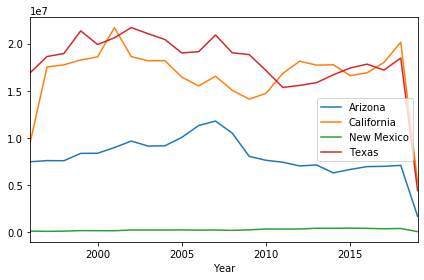

In [106]:
# plt.plot(ped_table[ped_table[2]], ped_table.index.values)

ped_table.plot(kind='line',)
plt.legend(['Arizona','California','New Mexico','Texas'])
plt.tight_layout()

In [182]:
can_bd = bd_ent.loc[bd_ent['Border'] == 'US-Canada Border'] 
can_bd = 

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
5,Madawaska,Maine,109,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,179,POINT (-68.3271 47.35446),2019,3
6,Pembina,North Dakota,3401,US-Canada Border,03/01/2019 12:00:00 AM,Bus Passengers,1054,POINT (-97.24333 48.96639),2019,3
8,Portal,North Dakota,3403,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Empty,6685,POINT (-102.54917 48.99583),2019,3
...,...,...,...,...,...,...,...,...,...,...
346725,Northgate,North Dakota,3406,US-Canada Border,01/01/1996 12:00:00 AM,Trucks,1107,POINT (-102.27 49),1996,1
346726,Turner,Montana,3306,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Empty,0,POINT (-108.39 49),1996,1
346727,Fort Kent,Maine,110,US-Canada Border,01/01/1996 12:00:00 AM,Trucks,1333,POINT (-68.6 47.25),1996,1
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1


In [189]:
can_bd.State.unique()

array(['Maine', 'New York', 'North Dakota', 'Montana', 'Minnesota',
       'Vermont', 'Washington', 'Idaho', 'Michigan', 'Alaska', 'Ohio'],
      dtype=object)